In [3]:
import drawsvg as dw
%load_ext jhmagics

The jhmagics extension is already loaded. To reload it, use:
  %reload_ext jhmagics


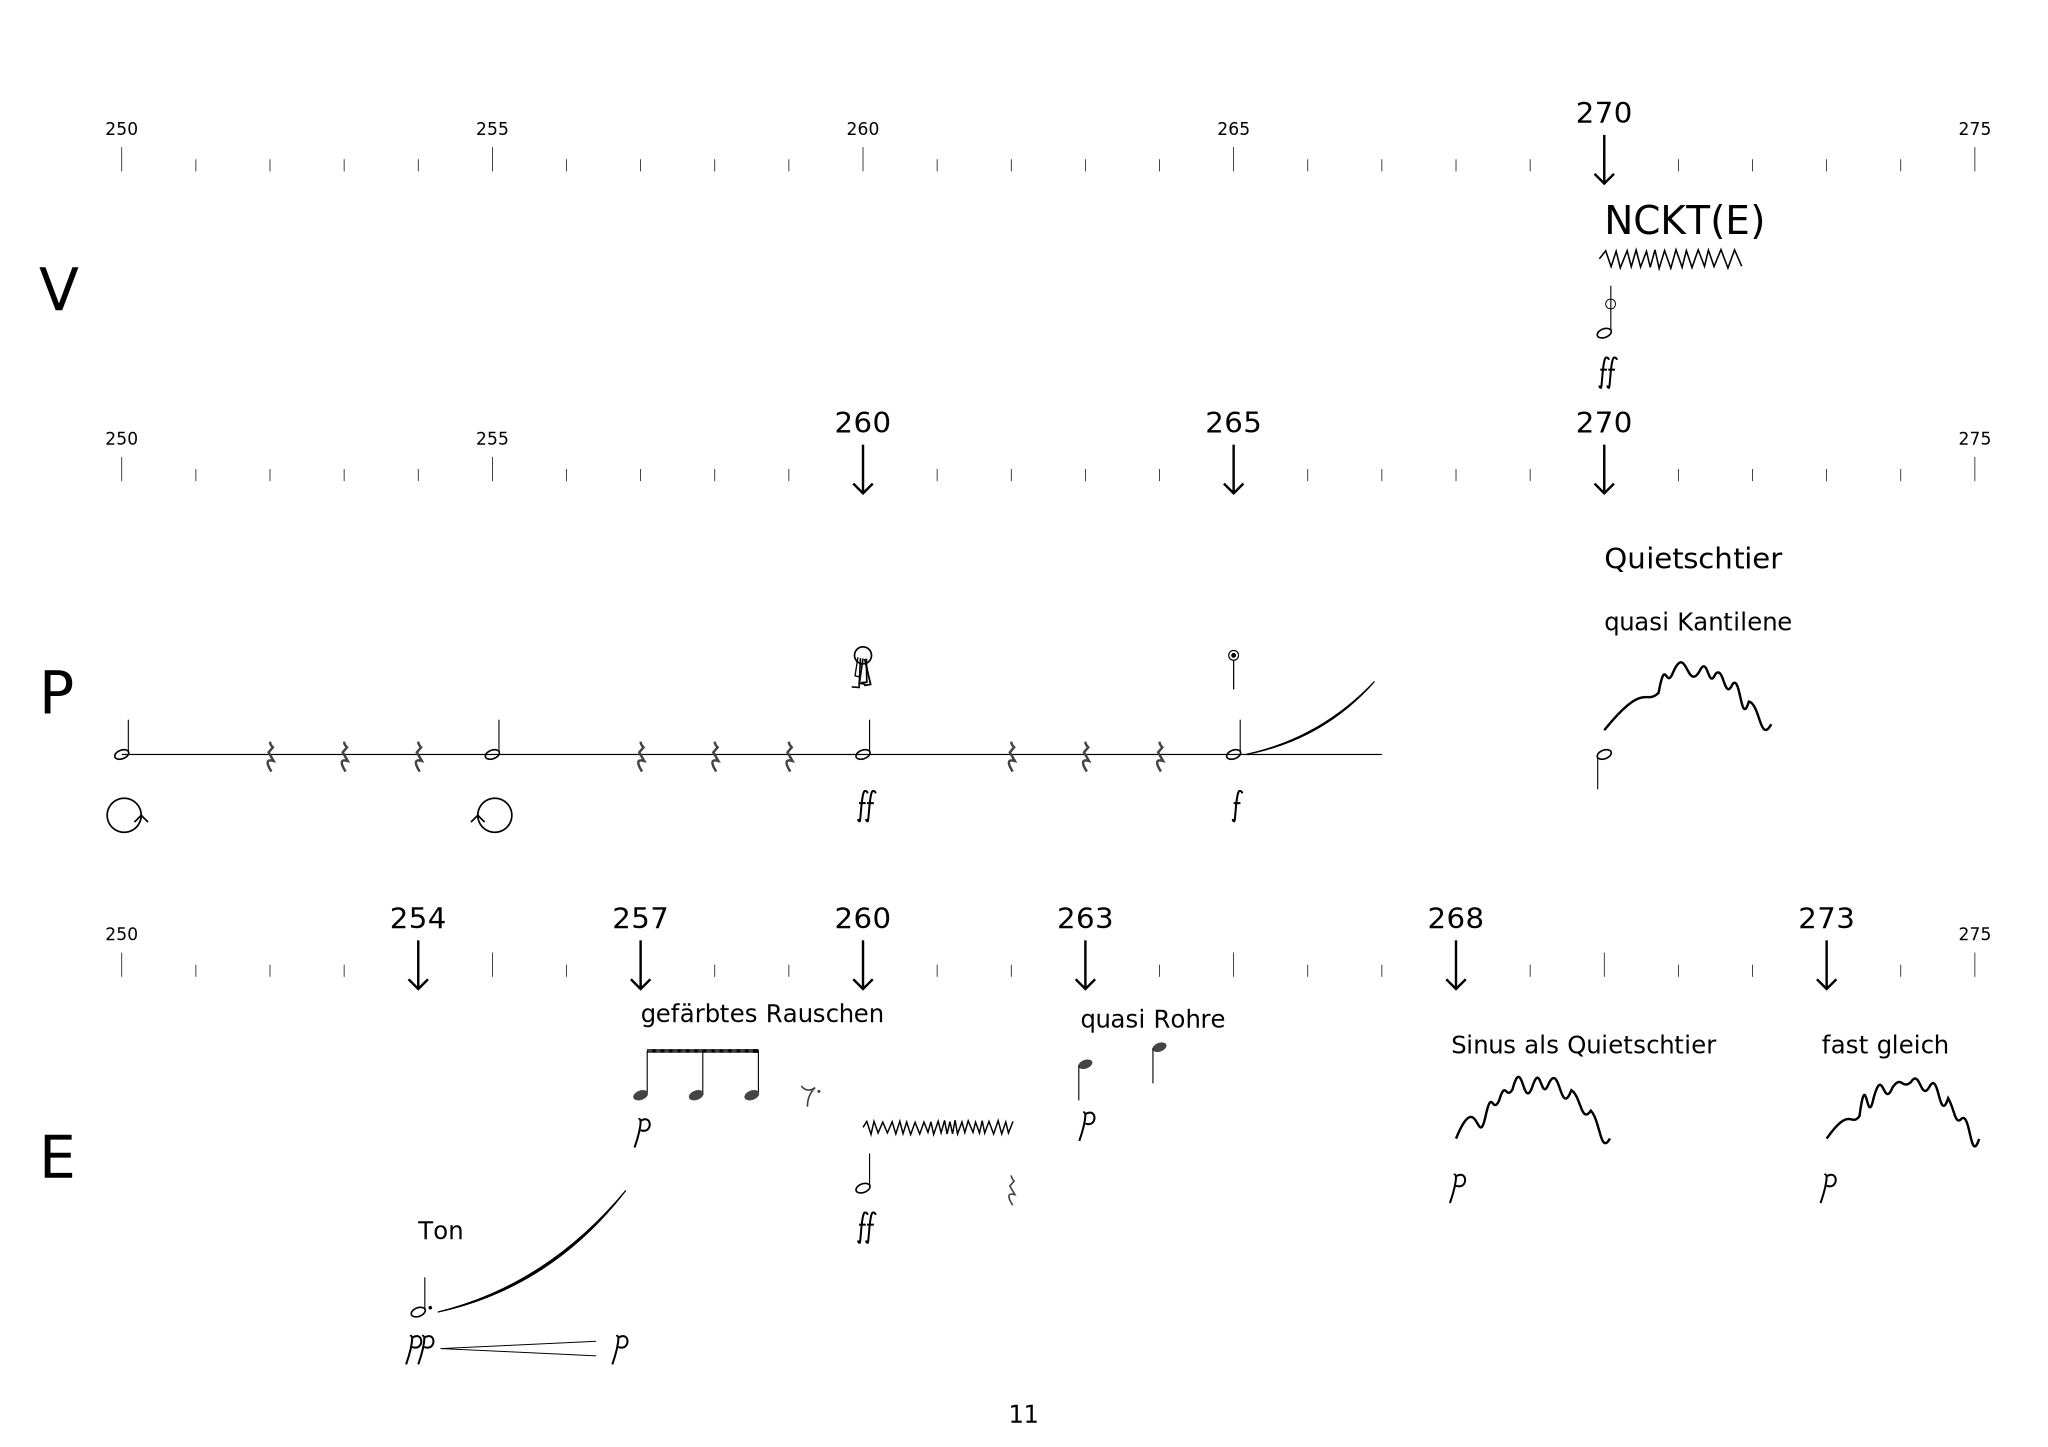

In [29]:
%%jh

w,h = 842,595
d = dw.Drawing(w,h,font_family='Simvoni')

# seitenzahl
seite = 11
d.append(dw.Text('%d'%seite,10,w/2,h-10,text_anchor='middle'))

# page settings
xnum,ynum = 26,22 # posts (= one more than divisions)
mleft,mright,mtop,mbot = 50,30,30,30
xsize,ysize = w-mleft-mright,h-mtop-mbot
xunit,yunit = xsize / (xnum-1),ysize / (ynum-1)

# load own functions
from os import listdir
dir = '/home/jh/src/svg/lib'
files = listdir(dir)
for file in files:
    if file[-3:] == '.py':
        f = '%s/%s' % (dir,file)
        exec(open(f).read())

# custom functions for xgrid and ygrid for this page
def xg(indx):
    return xgrid(indx,tm0)
def yg(indx):
    return ygrid(indx)
    
# raster am rand zur orientierung
#showGridOnMargins()
#showWritingSpace()

# zeitleisten und instrumente links
tm0 = 250  # zeit am anfang dieser seite
off = 15 # offset für die striche
 # normale zahlen in V P E
norm = [[250,255,260,265,275],[250,255,275],[250,275]]
 # events in V P E
event = [[270],[260,265,270],[254,257,260,263,268,273]]
 # ygrid positionen für die leisten
yleisten = [1,6,14]
 # instrumente 
insnamen = ['V','P','E']
ytimeplus = [*yleisten,ynum-1]
yposinsnamen = [ytimeplus[i]+(ytimeplus[i+1]-ytimeplus[i])/2 for i in range(3)]
 # write out
for l in range(3):
    y = ygrid(yleisten[l])
    text(insnamen[l],xgrid(0)-34,ygrid(yposinsnamen[l]),24,dominant_baseline='middle')
    for i in range(xnum):
        x = xgrid(i)
        if i%5==0: vline(x,y+off,-10,sw=.3)
        else: vline(x,y+off,-5,sw=.3)
        if (i+tm0) in norm[l]:
            text('%d'%(i+tm0),x,y,7,text_anchor='middle')
        elif (i+tm0) in event[l]:
            text('%d'%(i+tm0),x,y-5,12,text_anchor='middle')
            arrow(x,y,20,4)

# noten und pausen und dynamik größe
notsiz = 4.5
nothals = 1.2
pausiz = 4.5
dynsiz = 10

            
################# VOICE #################

 # nckte
x = xg(270)
ygindxvtop = yleisten[0]+.8
ygindxtext = ygindxvtop+.8 #text baseline
text('NCKT(E)',x,yg(ygindxtext),16)
y = yg(ygindxvtop+2.4)
krackelinie(x-2,yg(ygindxtext+.4),xg(271.8),yg(ygindxtext+.4),swfac=.8)
not2tel(x,y,nothals*1.4,notsiz)
circ(x+2.6,y-12,r=2,swfac=2,fill='none')
yy = y+20
fortissimo(x,yy,dynsiz)


################# PERCUSSION #################

 # linien und instrumente
ypercindx = yleisten[1]
yloffsets = [5] #abstände der linien von der perc zeitleiste
yltam = yloffsets[0]+ypercindx
ypercinstrs = [yltam]
startends = [250,267] 
insnamen = ['']
yoffsetins = [2] #abstand der namen von den linien
for i,yl in enumerate(ypercinstrs):
    y = yg(yl)
    x1 = xg(startends[i*2])
    x2 = xg(startends[i*2+1])
    line(x1,y,x2,y,stroke_width=0.5)
    text(insnamen[i],x1-2,yg(yl-yoffsetins[i]),12,font_family='Cantarell')
    
# tamtam
y = yg(yltam)
x = xg(250)
not2tel(x,y,nothals,notsiz)
paus4tel(x+xunit*2,y,pausiz,1.5)
paus4tel(x+xunit*3,y,pausiz,1.5)
paus4tel(x+xunit*4,y,pausiz,1.5)
yy = y+25
kreisLinks(x+1,yy)
x = xg(255)
not2tel(x,y,nothals,notsiz)
paus4tel(x+xunit*2,y,pausiz,1.5)
paus4tel(x+xunit*3,y,pausiz,1.5)
paus4tel(x+xunit*4,y,pausiz,1.5)
kreisRechts(x+1,yy)
x = xg(260)
schluesselbund(x,y-yunit*1.6,7)
not2tel(x,y,nothals,notsiz)
fortissimo(x,yy,dynsiz)
paus4tel(x+xunit*2,y,pausiz,1.5)
paus4tel(x+xunit*3,y,pausiz,1.5)
paus4tel(x+xunit*4,y,pausiz,1.5)
x = xg(265)
percSuperball(x,y-yunit*1.6)
not2tel(x,y,nothals,notsiz)
glisscurve(x+5,y,x+xunit*1.9,y-30,sw=.5)
forte(x,yy,dynsiz)

# quietscheentchen
y = yg(yltam)
x = xg(270)
text('Quietschtier',x,yg(ypercindx+2),12,font_family='Cantarell')
text('quasi Kantilene',x,yg(ypercindx+3),10,font_family='Cantarell Light')
not2tel(x,y,-nothals,notsiz)
yy = y-10
varVibr2_q(x,yy,xg(272),yy,xg(271),yy-yunit*2,hmin=3,hmax=15,prdmin=5,prdmax=12,sw=.5)



################# ELEKTRONIK #################

# 254
y = yg(20)
x = xg(254)
text('Ton',x,y-30,10,font_family='Cantarell Light')
not2tel(x,y,nothals,notsiz,dotted=1)
glisscurve(x+8,y,x+xunit*2.8,y-50,sw=.5)
yy = y+15
pianissimo(x,yy,dynsiz)
piano(xg(256.7),yy,dynsiz)
cresc(xg(254.3),yy,xg(256.4),yy,6)

# 257
y = yg(16.5)
x = xg(257)
text('gefärbtes Rauschen',x,y-30,10,font_family='Cantarell Light')
gruppe([x,y,xg(257.75),y,xg(258.5),y],1,y_space=notsiz)
paus8tel(xg(259.25),y,pausiz,dotted=1)
yy = y+15
piano(x,yy,dynsiz)

# 260
y = yg(18)
x = xg(260)
not2tel(x,y,nothals,notsiz)
paus4tel(xg(262),y,pausiz)
yy = y-25
krackelinie(x,yy,xg(262),yy,2,3,1,2)
yy = y+20
fortissimo(x,yy,dynsiz)

# 263
y = yg(16)
x = xg(263)
not4tel(x,y,-nothals,notsiz)
not4tel(x+xunit,y-7,-nothals,notsiz)
yy = y-15
text('quasi Rohre',x-2,yy,10,font_family='Cantarell Light')
yy = y+25
piano(x,yy,dynsiz)

# 268
y = yg(17.2)
x = xg(268)
varVibr2_q(x,y,xg(270),y+10,xg(269),y-yunit*2,hmin=3,hmax=15,prdmin=5,prdmax=10,sw=.3)
yy = y-40
text('Sinus als Quietschtier',x-2,yy+5,10,font_family='Cantarell Light')
yy = y+20
piano(x,yy,dynsiz)

# 273
y = yg(17.2)
x = xg(273)
varVibr2_q(x,y,xg(275),y+10,xg(274),y-yunit*2,hmin=3,hmax=15,prdmin=5,prdmax=10,sw=.3)
yy = y-40
text('fast gleich',x-2,yy+5,10,font_family='Cantarell Light')
yy = y+20
piano(x,yy,dynsiz)


d.set_pixel_scale(4)
d.save_png('partitur_%02d.png'%seite)
d.save_svg('partitur_%02d.svg'%seite)
d

In [5]:
help(not2tel)

Help on function not2tel in module __main__:

not2tel(x=20, y=30, dirlen=1, y_space=10, swfac=1, swfac_head=1, dotted=0, c='black', dotspace=1, dotsiz=1, **args)
    half note with xy as center
    dirlen=1 means in normal length (y_space*2.4) upwards
    dirlen=-1.1 means in length 2.64*yspace downwards
    swfac is stroke width of the line, as relation to y_space*0.1
    swfac_head is stroke width of the head line, as relation to the line * 1.5
    **args go to the head
    dotted=0 (default) means no dots, dotted=2 means two dots after the note
    dotspace and dotsiz set the distance and the size of the dot(s)
    returns the x,y of end of the line to use in 8th notes etc

